<a href="https://colab.research.google.com/github/R-aryan/Image_Classification_VGG16/blob/master/Classification_Cat_VS_Dogs_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras import optimizers
from keras.models import load_model
import numpy as np

import shutil
from os import listdir
from os.path import splitext



from keras.preprocessing import image

import matplotlib.pyplot as plt

In [0]:
train_directory= "/content/drive/My Drive/classification_Dataset/cat_VS_dogs/train"
test_directory="/content/drive/My Drive/classification_Dataset/cat_VS_dogs/test1"

In [0]:
src= '/content/drive/My Drive/classification_Dataset/cat_VS_dogs/train'
dest_d='/content/drive/My Drive/classification_Dataset/cat_VS_dogs/train/Dogs'
dest_c='/content/drive/My Drive/classification_Dataset/cat_VS_dogs/train/Cats'
validation_set='/content/drive/My Drive/classification_Dataset/cat_VS_dogs/validation_data'

In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=src,target_size=(224,224),batch_size=32)

Found 20438 images belonging to 2 classes.


In [6]:
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=validation_set, target_size=(224,224),batch_size=32)

Found 98 images belonging to 2 classes.


Here using the ImageDataGenerator method in keras I will import all the images of cat and dog in the model. ImageDataGenerator will automatically label the data and map all the labels to its specific data.

In [7]:

vggmodel = VGG16(weights='imagenet', include_top=True)





553467904/553467096 [==============================] - 16s 0us/step








Here in this part I will import VGG16 from keras with pre-trained weights which was trained on imagenet. Here as you can see that include top parameter is set to true. This means that weights for our whole model will be downloaded. If this is set to false then the pre-trained weights will only be downloaded for convolution layers and no weights will be downloaded for dense layers.

In [8]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Now as I run vggmodel.summary() then the summary of the whole VGG model which was downloaded will be printed. Its output is attached below.

After the model has been downloaded then I need to use this model for my problem statement which is to detect cats and dogs. So here I will set that I will not be training the weights of the first 19 layers and use it as it is. Therefore i am setting the trainable parameter to False for first 19 layers.

In [9]:
vggmodel.layers


In [10]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

Since my problem is to detect cats and dogs and it has two classes so the last dense layer of my model should be a 2 unit softmax dense layer. Here I am taking the second last layer of the model which is dense layer with 4096 units and adding a dense softmax layer of 2 units in the end. In this way I will remove the last layer of the VGG16 model which is made to predict 1000 classes.

In [18]:

X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


Now I will compile my new model. I will set the learning rate of SGD (Stochastic Gradient Descent) optimiser using lr parameter and since i have a 2 unit dense layer in the end so i will be using categorical_crossentropy as loss since the output of the model is categorical.

In [21]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [30]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/classification_Dataset/vgg16_tl.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')

model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])

model_final.save_weights("/content/drive/My Drive/classification_Dataset/vgg16_tl.h5")

Epoch 1/100
2/2 [==============================] - 33s 17s/step - loss: 0.0410 - acc: 0.9844 - val_loss: 0.1768 - val_acc: 0.9688

Epoch 00001: val_acc improved from -inf to 0.96875, saving model to /content/drive/My Drive/classification_Dataset/vgg16_tl.h5
Epoch 2/100
2/2 [==============================] - 33s 17s/step - loss: 0.0613 - acc: 0.9688 - val_loss: 0.0639 - val_acc: 0.9375

Epoch 00002: val_acc did not improve from 0.96875
Epoch 3/100
2/2 [==============================] - 16s 8s/step - loss: 0.0630 - acc: 0.9688 - val_loss: 0.0261 - val_acc: 1.0000

Epoch 00003: val_acc improved from 0.96875 to 1.00000, saving model to /content/drive/My Drive/classification_Dataset/vgg16_tl.h5
Epoch 4/100
2/2 [==============================] - 34s 17s/step - loss: 0.1175 - acc: 0.9688 - val_loss: 3.4574e-04 - val_acc: 1.0000

Epoch 00004: val_acc did not improve from 1.00000
Epoch 5/100
2/2 [==============================] - 18s 9s/step - loss: 0.0174 - acc: 1.0000 - val_loss: 0.1632 - val

Predicting the output

In [0]:
# from keras.preprocessing import image

# import matplotlib.pyplot as plt

img = image.load_img("/content/drive/My Drive/classification_Dataset/cat_VS_dogs/test1/12500.jpg",target_size=(224,224))
img = np.asarray(img)

plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
model_final.load_weights("/content/drive/My Drive/classification_Dataset/vgg16_tl.h5")
#saved_model.compile()

output = model_final.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

In [0]:
def prediction(path_image):
  img = image.load_img(path_image,target_size=(224,224))
  img = np.asarray(img)


  plt.imshow(img)
  img = np.expand_dims(img, axis=0)

  model_final.load_weights("/content/drive/My Drive/classification_Dataset/vgg16_tl.h5")

  output = model_final.predict(img)
  if output[0][0] > output[0][1]:
    print("cat")
  else:
    
    print('dog')




cat


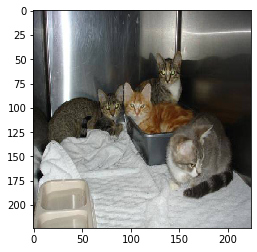

In [40]:
prediction("/content/drive/My Drive/classification_Dataset/cat_VS_dogs/test1/12500.jpg")


dog


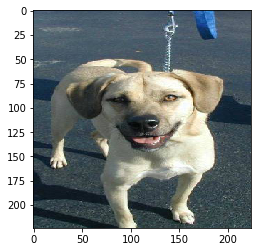

In [41]:
prediction("/content/drive/My Drive/classification_Dataset/cat_VS_dogs/test1/12499.jpg")